In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/sample_data/train_u6lujuX_CVtuZ9i.csv')


In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
gender_encoder = {'Male' : 1, 'Female' : -1}
df['Gender'] = df['Gender'].map(gender_encoder)

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,-1.0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1.0,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1.0,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1.0,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.drop(df.iloc[:, 3:6], axis = 1, inplace = True)

In [ ]:
df

,Loan_ID,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,LP002978,-1.0,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1.0,Yes,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1.0,Yes,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1.0,Yes,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.drop(df.iloc[:, 6:8], axis = 1, inplace = True)

In [ ]:
df

,Loan_ID,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,LP001002,1.0,No,5849,0.0,NaN,Urban,Y
1,LP001003,1.0,Yes,4583,1508.0,128.0,Rural,N
2,LP001005,1.0,Yes,3000,0.0,66.0,Urban,Y
3,LP001006,1.0,Yes,2583,2358.0,120.0,Urban,Y
4,LP001008,1.0,No,6000,0.0,141.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,-1.0,No,2900,0.0,71.0,Rural,Y
610,LP002979,1.0,Yes,4106,0.0,40.0,Rural,Y
611,LP002983,1.0,Yes,8072,240.0,253.0,Urban,Y
612,LP002984,1.0,Yes,7583,0.0,187.0,Urban,Y


In [ ]:
married_encoder = {'Yes': 1, 'No' : 0}
df['Married'] = df['Married'].map(married_encoder)

In [ ]:
df

,Loan_ID,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,LP001002,1.0,0.0,5849,0.0,NaN,Urban,Y
1,LP001003,1.0,1.0,4583,1508.0,128.0,Rural,N
2,LP001005,1.0,1.0,3000,0.0,66.0,Urban,Y
3,LP001006,1.0,1.0,2583,2358.0,120.0,Urban,Y
4,LP001008,1.0,0.0,6000,0.0,141.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,-1.0,0.0,2900,0.0,71.0,Rural,Y
610,LP002979,1.0,1.0,4106,0.0,40.0,Rural,Y
611,LP002983,1.0,1.0,8072,240.0,253.0,Urban,Y
612,LP002984,1.0,1.0,7583,0.0,187.0,Urban,Y


In [ ]:
pd.DataFrame(df)

,Loan_ID,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,LP001002,1.0,0.0,5849,0.0,NaN,Urban,Y
1,LP001003,1.0,1.0,4583,1508.0,128.0,Rural,N
2,LP001005,1.0,1.0,3000,0.0,66.0,Urban,Y
3,LP001006,1.0,1.0,2583,2358.0,120.0,Urban,Y
4,LP001008,1.0,0.0,6000,0.0,141.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,-1.0,0.0,2900,0.0,71.0,Rural,Y
610,LP002979,1.0,1.0,4106,0.0,40.0,Rural,Y
611,LP002983,1.0,1.0,8072,240.0,253.0,Urban,Y
612,LP002984,1.0,1.0,7583,0.0,187.0,Urban,Y


In [ ]:
df = pd.get_dummies(df, columns = ['Property_Area'])


In [ ]:
df

,Loan_ID,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1.0,0.0,5849,0.0,NaN,Y,False,False,True
1,LP001003,1.0,1.0,4583,1508.0,128.0,N,True,False,False
2,LP001005,1.0,1.0,3000,0.0,66.0,Y,False,False,True
3,LP001006,1.0,1.0,2583,2358.0,120.0,Y,False,False,True
4,LP001008,1.0,0.0,6000,0.0,141.0,Y,False,False,True
...,...,...,...,...,...,...,...,...,...,...
609,LP002978,-1.0,0.0,2900,0.0,71.0,Y,True,False,False
610,LP002979,1.0,1.0,4106,0.0,40.0,Y,True,False,False
611,LP002983,1.0,1.0,8072,240.0,253.0,Y,False,False,True
612,LP002984,1.0,1.0,7583,0.0,187.0,Y,False,False,True


In [ ]:
df['Property_Area_Rural'] = df['Property_Area_Rural'].replace({True: 1, False: 0})


df

,Loan_ID,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1.0,0.0,5849,0.0,NaN,Y,0,False,True
1,LP001003,1.0,1.0,4583,1508.0,128.0,N,1,False,False
2,LP001005,1.0,1.0,3000,0.0,66.0,Y,0,False,True
3,LP001006,1.0,1.0,2583,2358.0,120.0,Y,0,False,True
4,LP001008,1.0,0.0,6000,0.0,141.0,Y,0,False,True
...,...,...,...,...,...,...,...,...,...,...
609,LP002978,-1.0,0.0,2900,0.0,71.0,Y,1,False,False
610,LP002979,1.0,1.0,4106,0.0,40.0,Y,1,False,False
611,LP002983,1.0,1.0,8072,240.0,253.0,Y,0,False,True
612,LP002984,1.0,1.0,7583,0.0,187.0,Y,0,False,True


In [ ]:
df['Property_Area_Semiurban'] = df['Property_Area_Semiurban'].replace({True: 1, False: 0})
df['Property_Area_Urban'] = df['Property_Area_Urban'].replace({True: 1, False: 0})

In [ ]:
df

,Loan_ID,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1.0,0.0,5849,0.0,NaN,Y,0,0,1
1,LP001003,1.0,1.0,4583,1508.0,128.0,N,1,0,0
2,LP001005,1.0,1.0,3000,0.0,66.0,Y,0,0,1
3,LP001006,1.0,1.0,2583,2358.0,120.0,Y,0,0,1
4,LP001008,1.0,0.0,6000,0.0,141.0,Y,0,0,1
...,...,...,...,...,...,...,...,...,...,...
609,LP002978,-1.0,0.0,2900,0.0,71.0,Y,1,0,0
610,LP002979,1.0,1.0,4106,0.0,40.0,Y,1,0,0
611,LP002983,1.0,1.0,8072,240.0,253.0,Y,0,0,1
612,LP002984,1.0,1.0,7583,0.0,187.0,Y,0,0,1


In [ ]:
lable_encoder = {'Y': 1, 'N': 0}

df['Loan_Status'] = df['Loan_Status'].map(lable_encoder)


In [ ]:
df

,Loan_ID,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1.0,0.0,5849,0.0,NaN,1,0,0,1
1,LP001003,1.0,1.0,4583,1508.0,128.0,0,1,0,0
2,LP001005,1.0,1.0,3000,0.0,66.0,1,0,0,1
3,LP001006,1.0,1.0,2583,2358.0,120.0,1,0,0,1
4,LP001008,1.0,0.0,6000,0.0,141.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
609,LP002978,-1.0,0.0,2900,0.0,71.0,1,1,0,0
610,LP002979,1.0,1.0,4106,0.0,40.0,1,1,0,0
611,LP002983,1.0,1.0,8072,240.0,253.0,1,0,0,1
612,LP002984,1.0,1.0,7583,0.0,187.0,1,0,0,1


In [ ]:
y_label = df['Loan_Status']

In [ ]:
y_label

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [ ]:
df.drop('Loan_Status', axis = 1, inplace = True)

In [ ]:
df

,Loan_ID,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1.0,0.0,5849,0.0,NaN,0,0,1
1,LP001003,1.0,1.0,4583,1508.0,128.0,1,0,0
2,LP001005,1.0,1.0,3000,0.0,66.0,0,0,1
3,LP001006,1.0,1.0,2583,2358.0,120.0,0,0,1
4,LP001008,1.0,0.0,6000,0.0,141.0,0,0,1
...,...,...,...,...,...,...,...,...,...
609,LP002978,-1.0,0.0,2900,0.0,71.0,1,0,0
610,LP002979,1.0,1.0,4106,0.0,40.0,1,0,0
611,LP002983,1.0,1.0,8072,240.0,253.0,0,0,1
612,LP002984,1.0,1.0,7583,0.0,187.0,0,0,1


In [ ]:
df = df.dropna(subset=['LoanAmount'])


In [ ]:
df

,Loan_ID,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1.0,1.0,4583,1508.0,128.0,1,0,0
2,LP001005,1.0,1.0,3000,0.0,66.0,0,0,1
3,LP001006,1.0,1.0,2583,2358.0,120.0,0,0,1
4,LP001008,1.0,0.0,6000,0.0,141.0,0,0,1
5,LP001011,1.0,1.0,5417,4196.0,267.0,0,0,1
...,...,...,...,...,...,...,...,...,...
609,LP002978,-1.0,0.0,2900,0.0,71.0,1,0,0
610,LP002979,1.0,1.0,4106,0.0,40.0,1,0,0
611,LP002983,1.0,1.0,8072,240.0,253.0,0,0,1
612,LP002984,1.0,1.0,7583,0.0,187.0,0,0,1


In [ ]:
df.drop('Loan_ID', axis =1 , inplace = True)

<ipython-input-1095-ff4a3c2a5e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Loan_ID', axis =1 , inplace = True)


In [ ]:
df

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,1.0,4583,1508.0,128.0,1,0,0
2,1.0,1.0,3000,0.0,66.0,0,0,1
3,1.0,1.0,2583,2358.0,120.0,0,0,1
4,1.0,0.0,6000,0.0,141.0,0,0,1
5,1.0,1.0,5417,4196.0,267.0,0,0,1
...,...,...,...,...,...,...,...,...
609,-1.0,0.0,2900,0.0,71.0,1,0,0
610,1.0,1.0,4106,0.0,40.0,1,0,0
611,1.0,1.0,8072,240.0,253.0,0,0,1
612,1.0,1.0,7583,0.0,187.0,0,0,1


<Axes: >

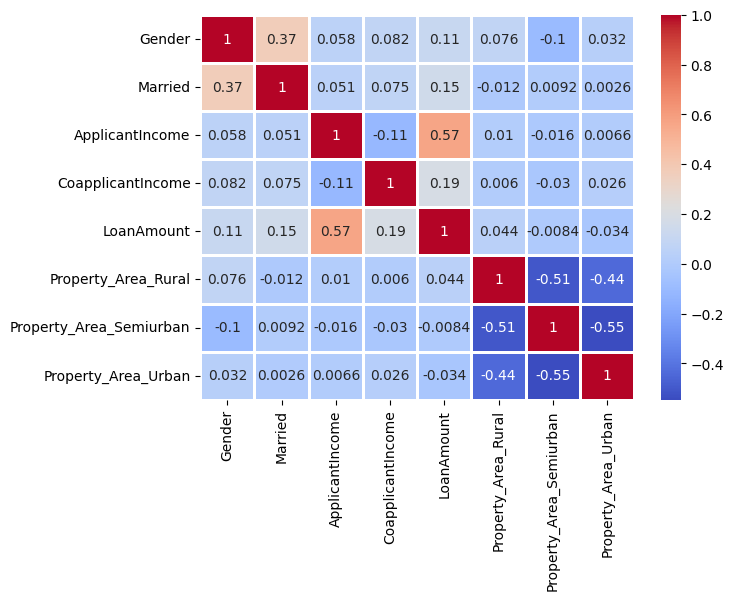

In [ ]:
plt.figure(figsize = (7,5))

corr_metrix = df.corr()

sns.heatmap(corr_metrix, annot = True, cmap = 'coolwarm', linewidths = 2)

<Axes: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

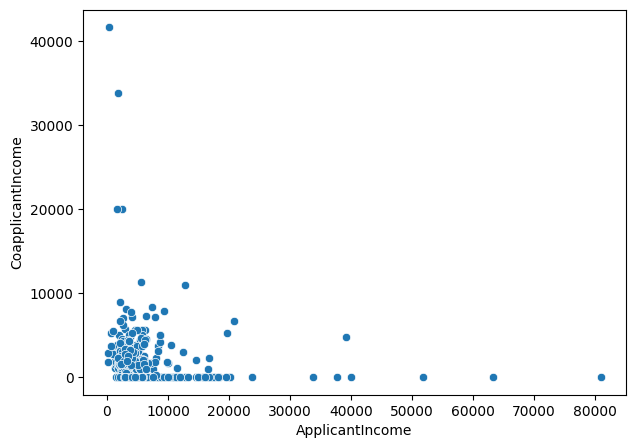

In [ ]:
plt.figure(figsize = (7,5))

#plt.scatter(x = df['ApplicantIncome'], y = df['CoapplicantIncome']) #plt is not clear plot but sns is clear plot than plt

sns.scatterplot(x = df['ApplicantIncome'], y = df['CoapplicantIncome'])

<Axes: xlabel='ApplicantIncome'>

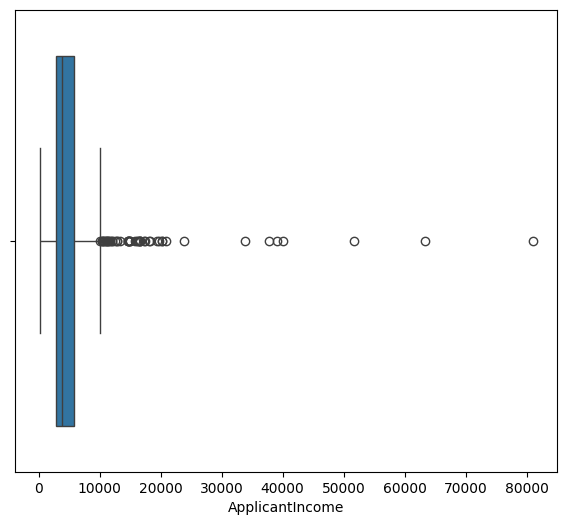

In [ ]:
plt.figure(figsize =( 7,6))

sns.boxplot(x = df['ApplicantIncome'])
#plt.boxplot(df['ApplicantIncome'])

<Axes: ylabel='ApplicantIncome'>

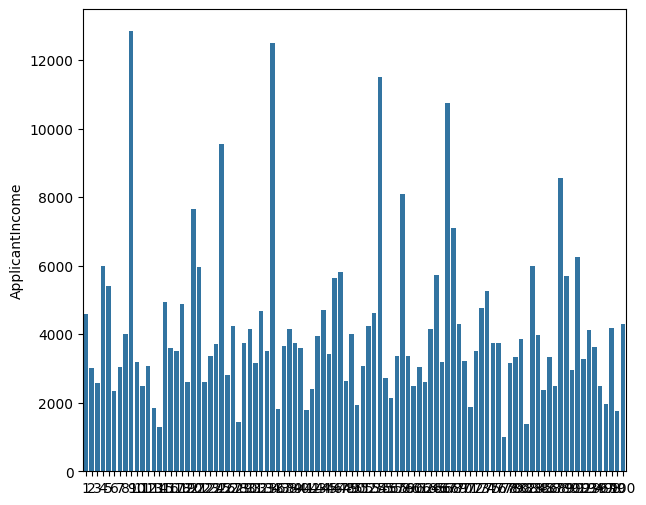

In [ ]:
plt.figure(figsize = (7, 6))

sns.barplot(df.loc[0:100, 'ApplicantIncome'])

<Axes: ylabel='ApplicantIncome'>

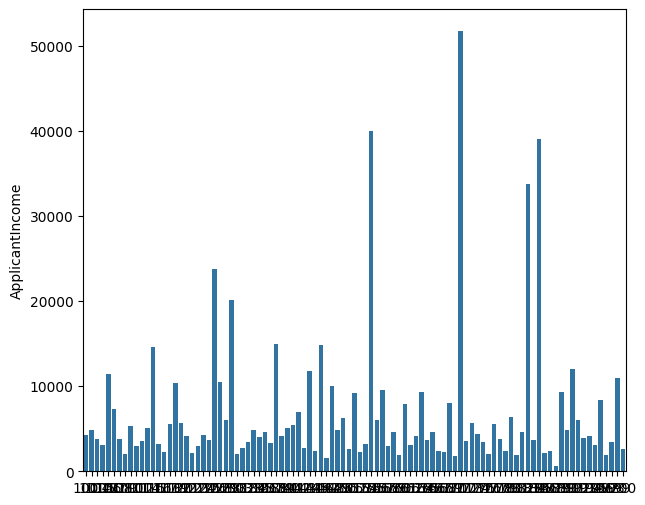

In [ ]:
plt.figure(figsize = (7, 6))

sns.barplot(df.loc[100:200, 'ApplicantIncome'])

<Axes: ylabel='ApplicantIncome'>

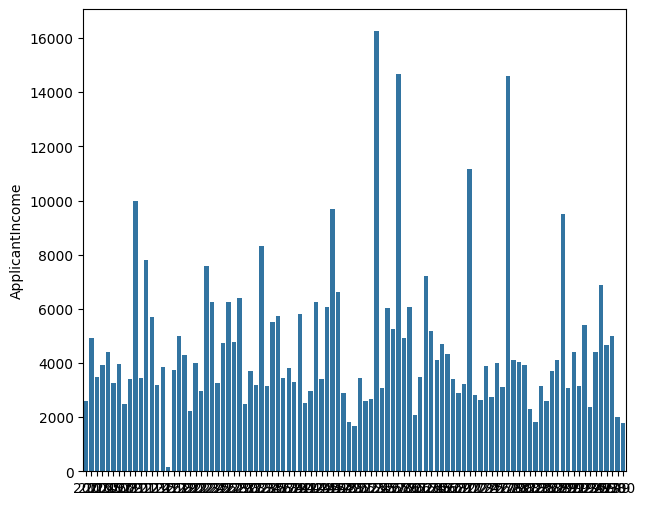

In [ ]:
plt.figure(figsize = (7, 6))

sns.barplot(df.loc[200: 300, 'ApplicantIncome'])

<Axes: ylabel='ApplicantIncome'>

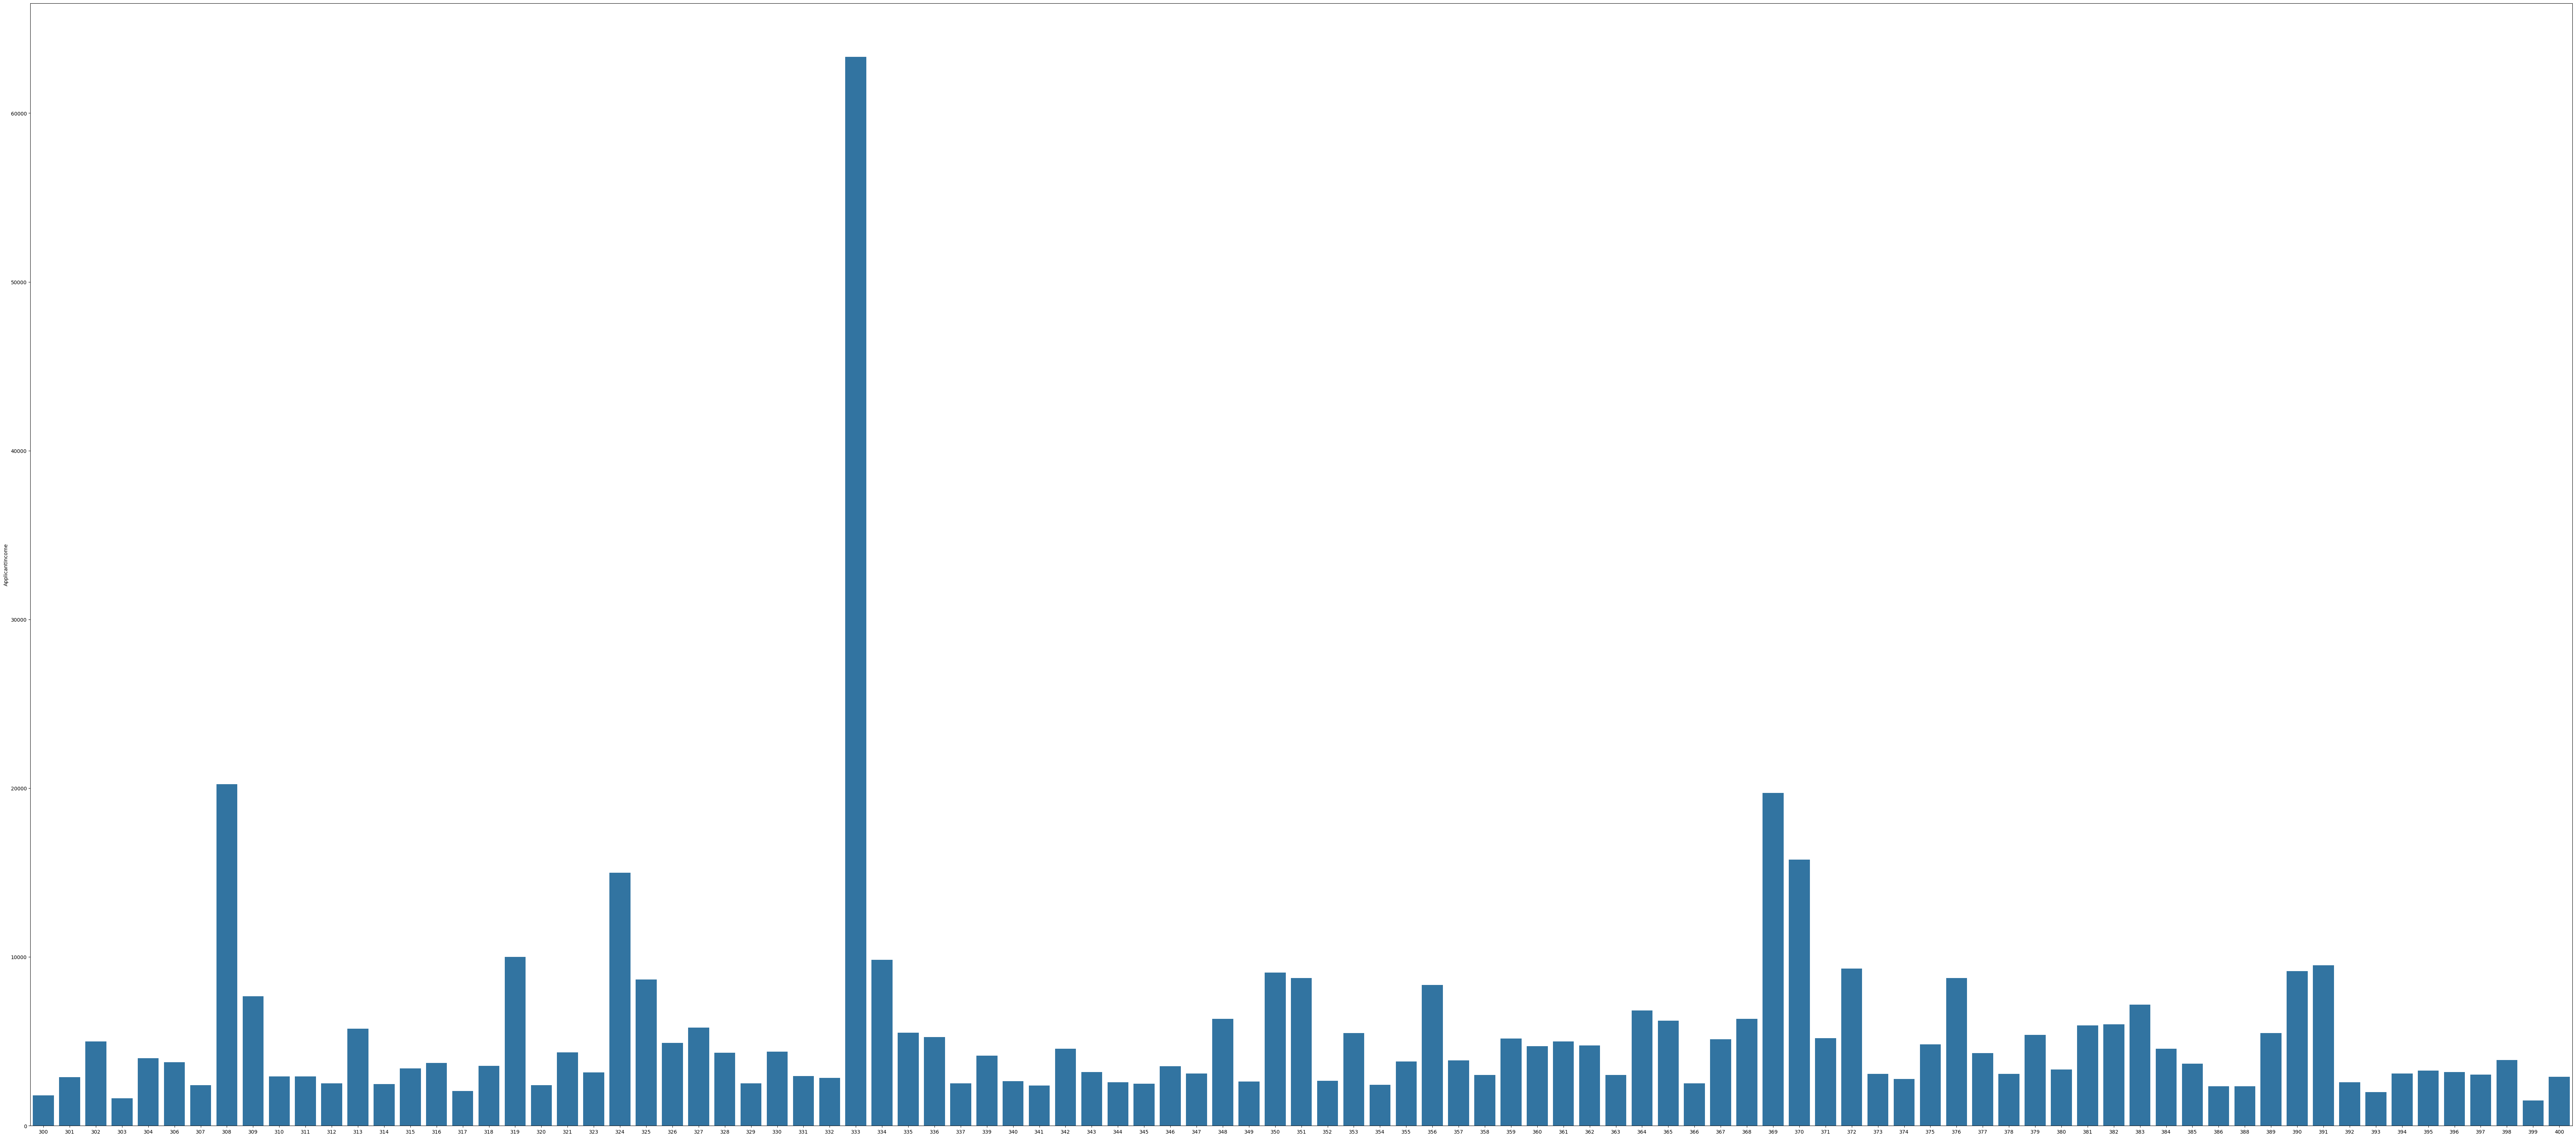

In [ ]:
plt.figure(figsize = (90, 40))

sns.barplot(df.loc[300:400, 'ApplicantIncome'])

In [ ]:
df['ApplicantIncome'][332]

2833

<Axes: ylabel='ApplicantIncome'>

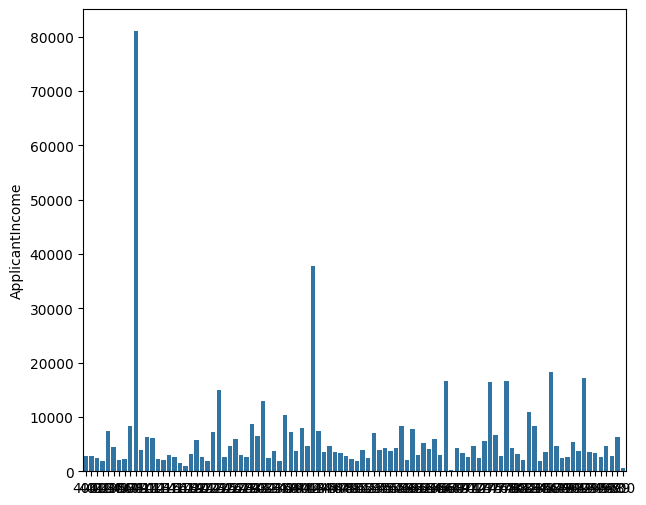

In [ ]:
plt.figure(figsize = (7, 6))

sns.barplot(df.loc[400:500, 'ApplicantIncome'])

In [ ]:
df

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,1.0,4583,1508.0,128.0,1,0,0
2,1.0,1.0,3000,0.0,66.0,0,0,1
3,1.0,1.0,2583,2358.0,120.0,0,0,1
4,1.0,0.0,6000,0.0,141.0,0,0,1
5,1.0,1.0,5417,4196.0,267.0,0,0,1
...,...,...,...,...,...,...,...,...
609,-1.0,0.0,2900,0.0,71.0,1,0,0
610,1.0,1.0,4106,0.0,40.0,1,0,0
611,1.0,1.0,8072,240.0,253.0,0,0,1
612,1.0,1.0,7583,0.0,187.0,0,0,1


In [ ]:
df['LoanAmount'].isna().sum()

0

In [ ]:
#df['ApplicantIncome'] = df['ApplicantIncome'].dropna()

In [ ]:
df

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,1.0,4583,1508.0,128.0,1,0,0
2,1.0,1.0,3000,0.0,66.0,0,0,1
3,1.0,1.0,2583,2358.0,120.0,0,0,1
4,1.0,0.0,6000,0.0,141.0,0,0,1
5,1.0,1.0,5417,4196.0,267.0,0,0,1
...,...,...,...,...,...,...,...,...
609,-1.0,0.0,2900,0.0,71.0,1,0,0
610,1.0,1.0,4106,0.0,40.0,1,0,0
611,1.0,1.0,8072,240.0,253.0,0,0,1
612,1.0,1.0,7583,0.0,187.0,0,0,1


**KNOWING THE NUMBER OF DUPLICATES**

In [ ]:
duplicates = df['CoapplicantIncome'].duplicated(keep = False)

In [ ]:
num_duplicates = duplicates.sum()
num_duplicates

353

In [ ]:
df

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,1.0,4583,1508.0,128.0,1,0,0
2,1.0,1.0,3000,0.0,66.0,0,0,1
3,1.0,1.0,2583,2358.0,120.0,0,0,1
4,1.0,0.0,6000,0.0,141.0,0,0,1
5,1.0,1.0,5417,4196.0,267.0,0,0,1
...,...,...,...,...,...,...,...,...
609,-1.0,0.0,2900,0.0,71.0,1,0,0
610,1.0,1.0,4106,0.0,40.0,1,0,0
611,1.0,1.0,8072,240.0,253.0,0,0,1
612,1.0,1.0,7583,0.0,187.0,0,0,1


In [ ]:
df = df.drop_duplicates(subset = 'CoapplicantIncome')

In [ ]:
df

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,1.0,4583,1508.0,128.0,1,0,0
2,1.0,1.0,3000,0.0,66.0,0,0,1
3,1.0,1.0,2583,2358.0,120.0,0,0,1
5,1.0,1.0,5417,4196.0,267.0,0,0,1
6,1.0,1.0,2333,1516.0,95.0,0,0,1
...,...,...,...,...,...,...,...,...
600,-1.0,0.0,416,41667.0,350.0,0,0,1
601,1.0,1.0,2894,2792.0,155.0,1,0,0
603,1.0,0.0,3676,4301.0,172.0,1,0,0
607,1.0,1.0,3987,1411.0,157.0,1,0,0


In [ ]:
df = df.drop_duplicates(subset = 'ApplicantIncome')

In [ ]:
df

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,1.0,4583,1508.0,128.0,1,0,0
2,1.0,1.0,3000,0.0,66.0,0,0,1
3,1.0,1.0,2583,2358.0,120.0,0,0,1
5,1.0,1.0,5417,4196.0,267.0,0,0,1
6,1.0,1.0,2333,1516.0,95.0,0,0,1
...,...,...,...,...,...,...,...,...
600,-1.0,0.0,416,41667.0,350.0,0,0,1
601,1.0,1.0,2894,2792.0,155.0,1,0,0
603,1.0,0.0,3676,4301.0,172.0,1,0,0
607,1.0,1.0,3987,1411.0,157.0,1,0,0


In [ ]:
duplicates = df['CoapplicantIncome'].duplicated(keep = False)

In [ ]:
num_duplicates = duplicates.sum()
num_duplicates

0

<Axes: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

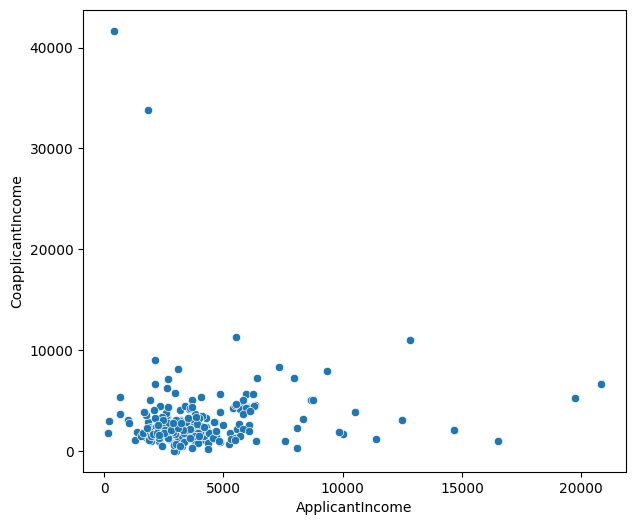

In [ ]:
plt.figure(figsize= (7,6))

sns.scatterplot(x = df['ApplicantIncome'], y = df['CoapplicantIncome'])

<Axes: ylabel='ApplicantIncome'>

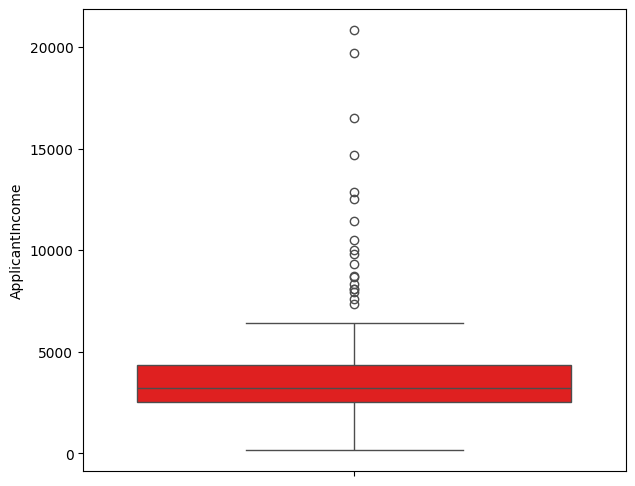

In [ ]:
plt.figure(figsize = (7,6))

sns.boxplot(df['ApplicantIncome'], color = 'red')

<Axes: ylabel='ApplicantIncome'>

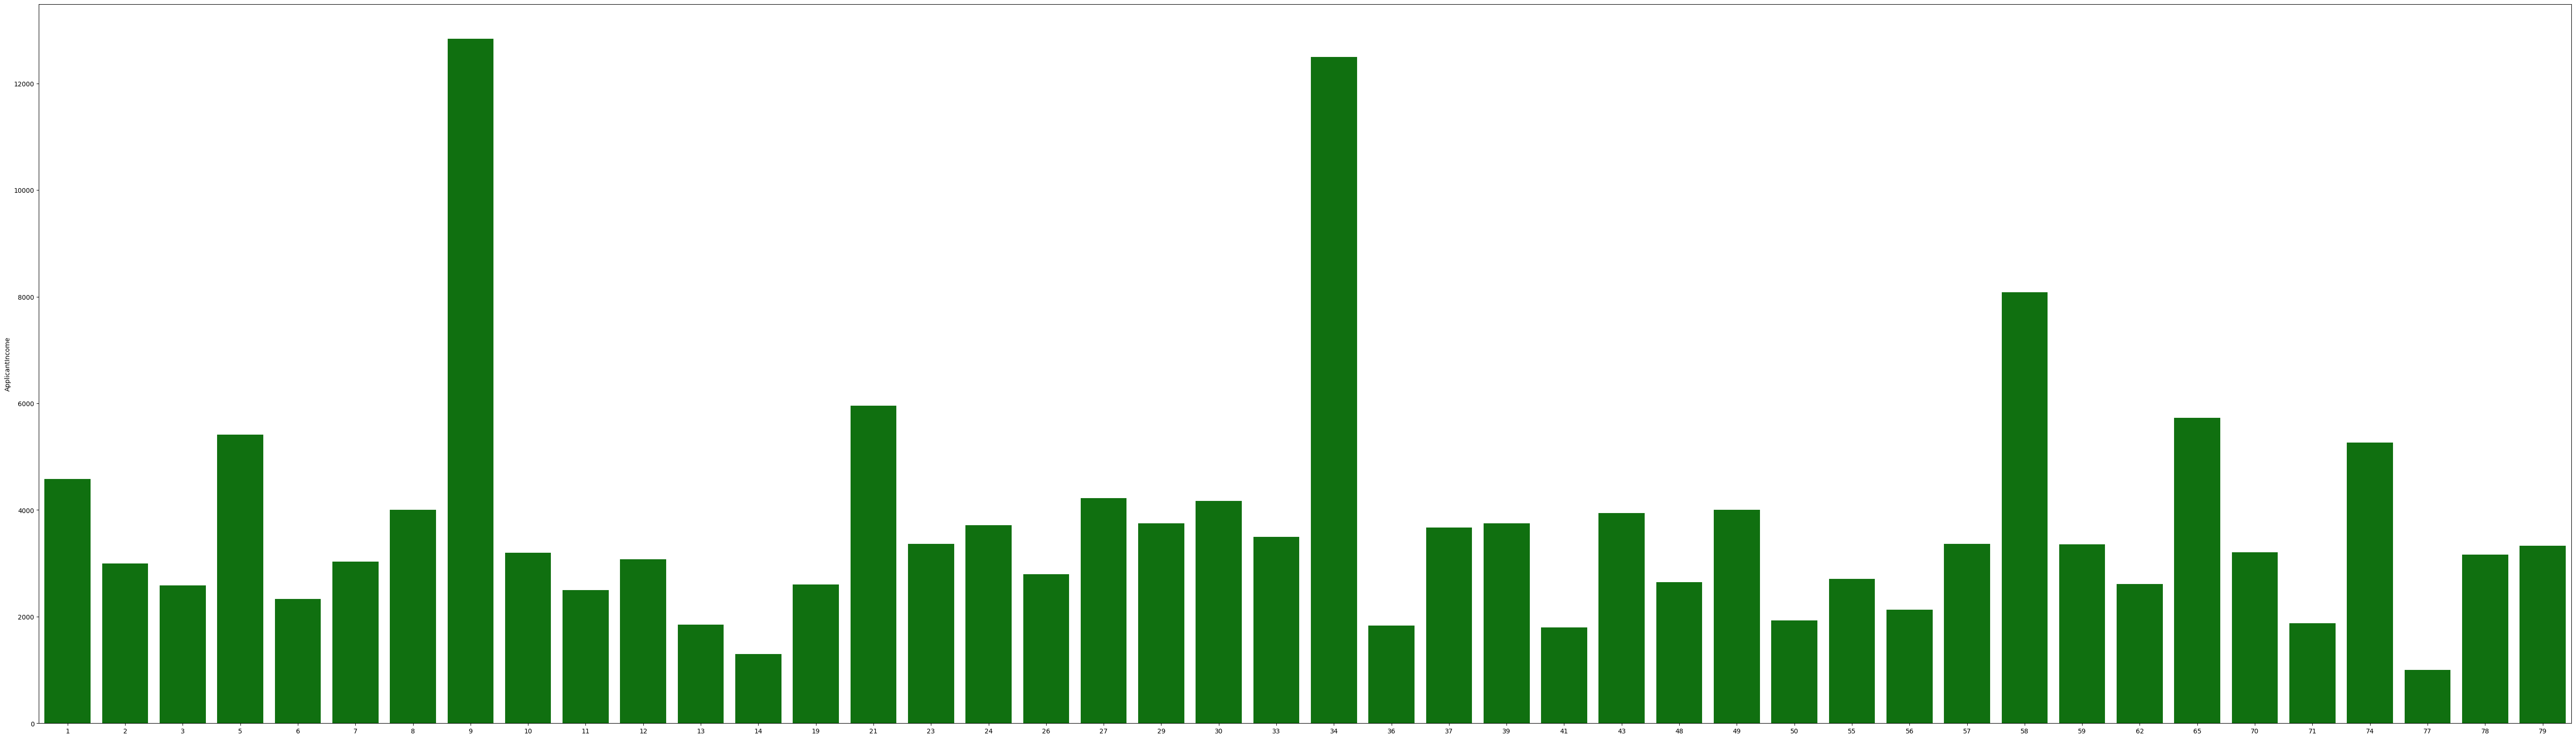

In [ ]:
plt.figure(figsize = (70, 20))

sns.barplot(df.loc[0:80, 'ApplicantIncome'], color = 'green')

<Axes: ylabel='ApplicantIncome'>

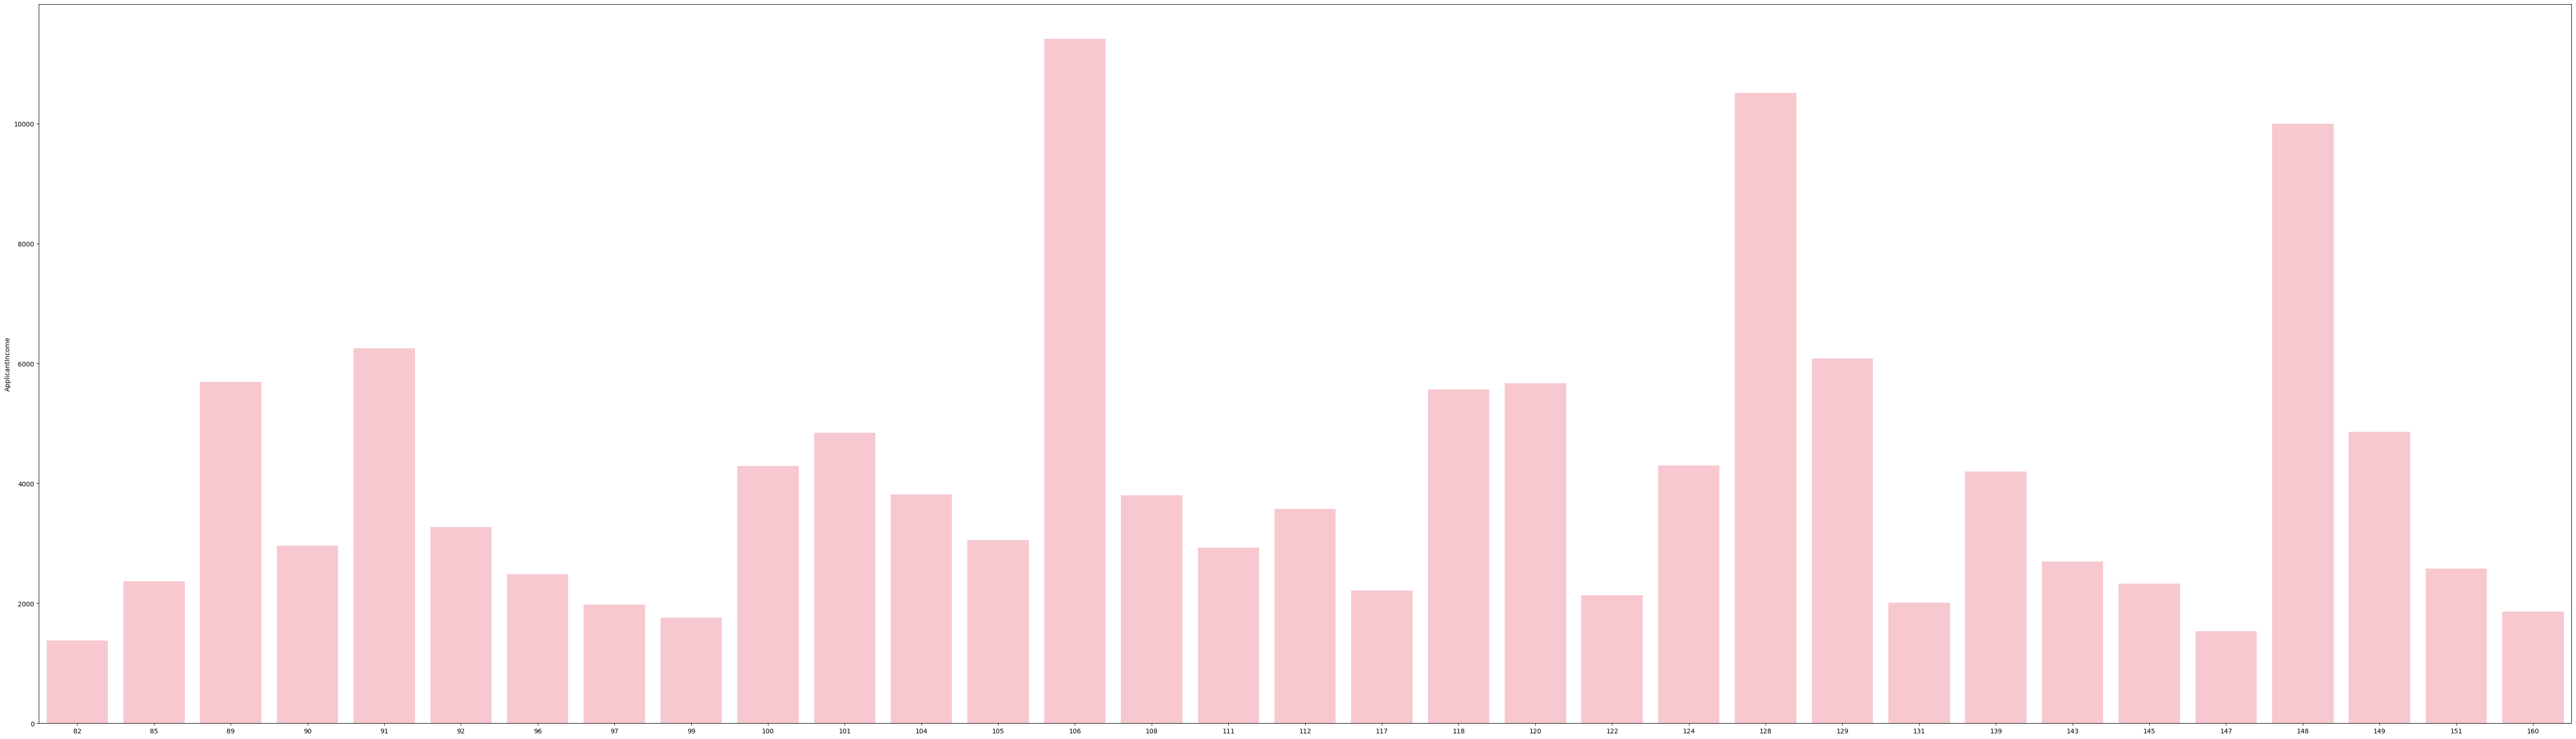

In [ ]:
plt.figure(figsize = (70, 20))

sns.barplot(df.loc[80:161, 'ApplicantIncome'], color = 'pink')

<Axes: ylabel='ApplicantIncome'>

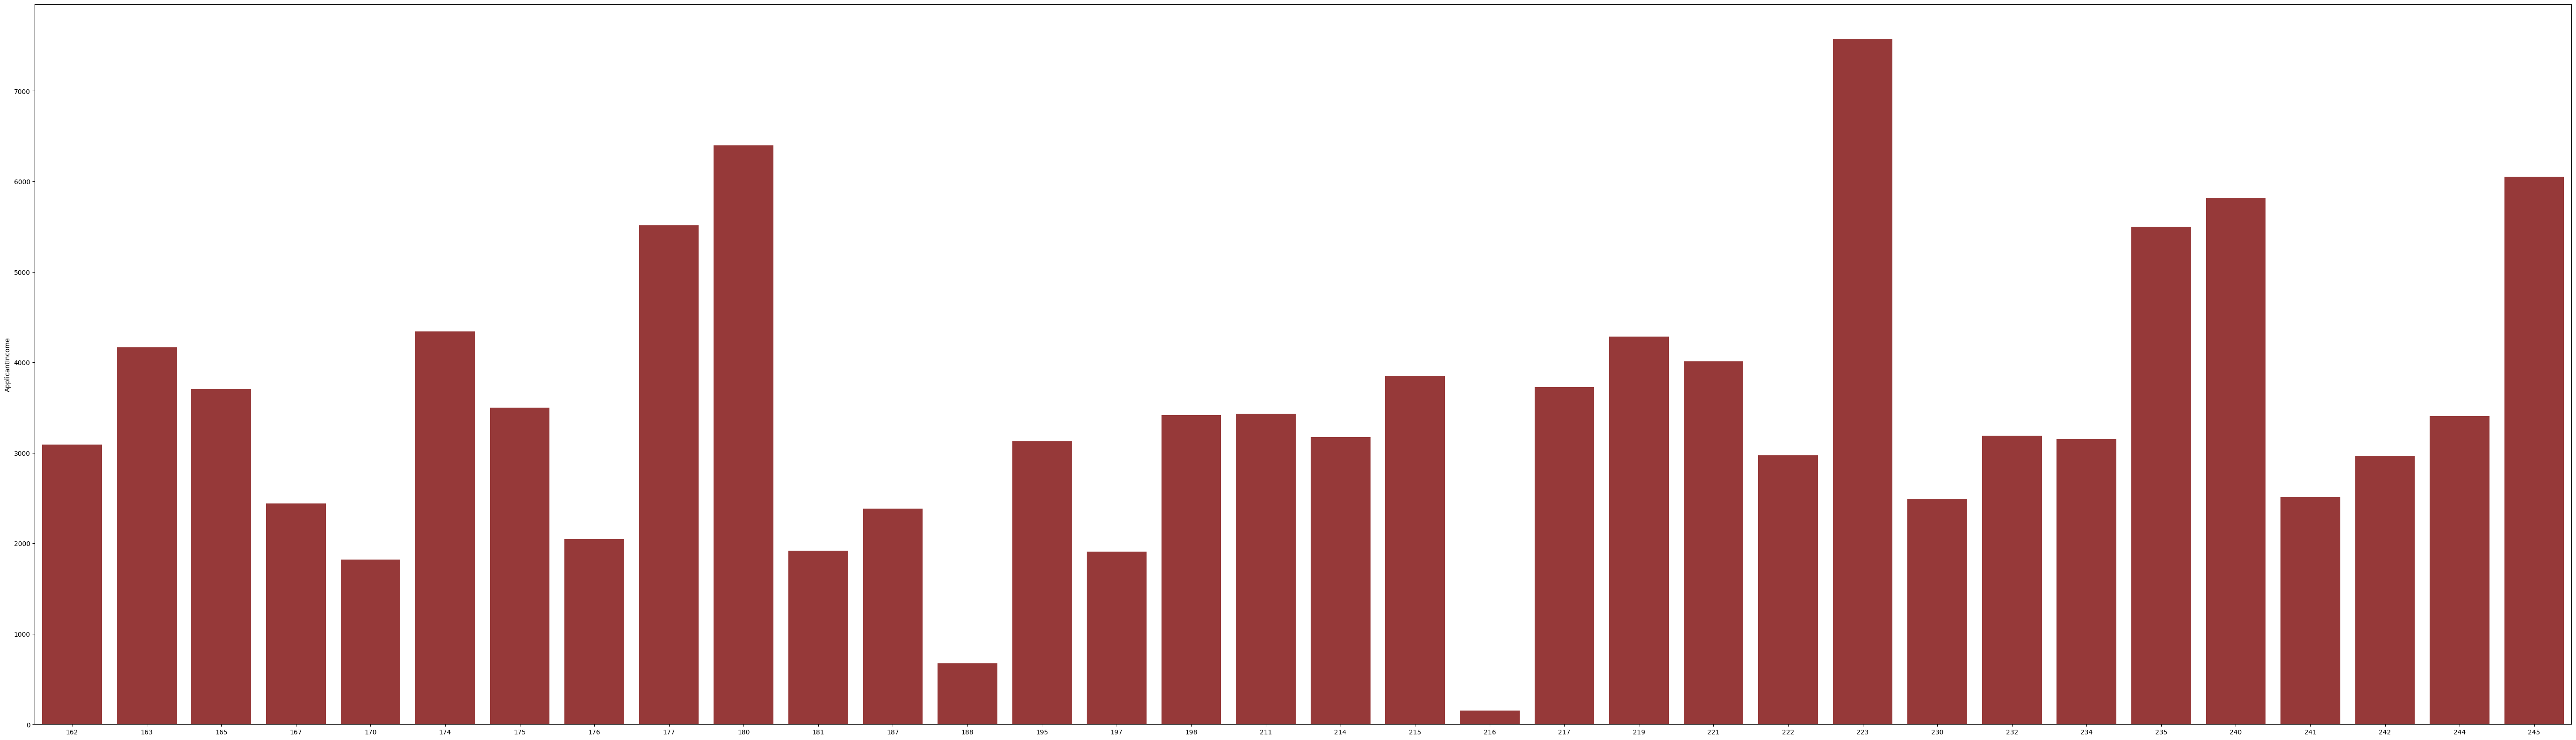

In [ ]:
plt.figure(figsize = (70, 20))

sns.barplot(df.loc[161:245, 'ApplicantIncome'], color = 'brown')

In [ ]:
df['ApplicantIncome'][223]

7578

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

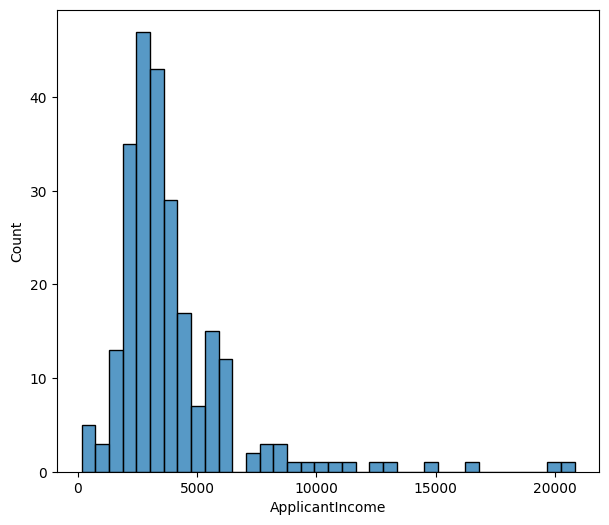

In [ ]:
plt.figure(figsize = (7, 6))

sns.histplot(df['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

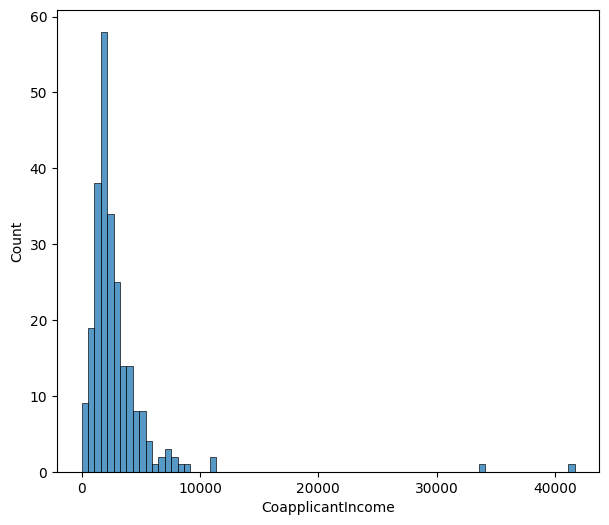

In [ ]:
plt.figure(figsize = (7, 6))

sns.histplot(df['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

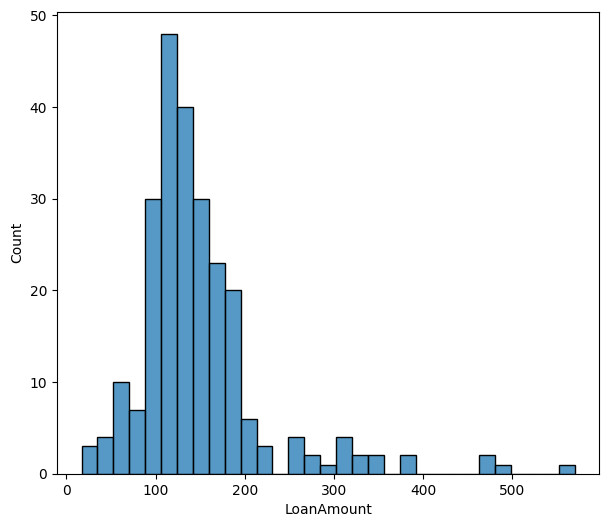

In [ ]:
plt.figure(figsize = (7, 6))

sns.histplot(df['LoanAmount'])

In [ ]:
df

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,1.0,4583,1508.0,128.0,1,0,0
2,1.0,1.0,3000,0.0,66.0,0,0,1
3,1.0,1.0,2583,2358.0,120.0,0,0,1
5,1.0,1.0,5417,4196.0,267.0,0,0,1
6,1.0,1.0,2333,1516.0,95.0,0,0,1
...,...,...,...,...,...,...,...,...
600,-1.0,0.0,416,41667.0,350.0,0,0,1
601,1.0,1.0,2894,2792.0,155.0,1,0,0
603,1.0,0.0,3676,4301.0,172.0,1,0,0
607,1.0,1.0,3987,1411.0,157.0,1,0,0


In [ ]:
df = df.dropna(subset = ['Gender'])

In [ ]:
df = df.dropna(subset = 'Married')

In [ ]:
df

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,1.0,4583,1508.0,128.0,1,0,0
2,1.0,1.0,3000,0.0,66.0,0,0,1
3,1.0,1.0,2583,2358.0,120.0,0,0,1
5,1.0,1.0,5417,4196.0,267.0,0,0,1
6,1.0,1.0,2333,1516.0,95.0,0,0,1
...,...,...,...,...,...,...,...,...
600,-1.0,0.0,416,41667.0,350.0,0,0,1
601,1.0,1.0,2894,2792.0,155.0,1,0,0
603,1.0,0.0,3676,4301.0,172.0,1,0,0
607,1.0,1.0,3987,1411.0,157.0,1,0,0


In [ ]:
df.isnull().sum()

,0
Gender,0
Married,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Property_Area_Rural,0
Property_Area_Semiurban,0
Property_Area_Urban,0


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_reduced_data = tsne.fit_transform(df)

In [ ]:
tsne_reduced_data

array([[ -7.9841785 ,   4.06403   ],
       [-11.638215  ,  -6.6539025 ],
       [  3.558827  ,  -6.2974977 ],
       [  0.77863455,  10.753708  ],
       [ -1.3477601 , -12.297154  ],
       [  2.9058065 ,  -1.9536785 ],
       [ -7.576234  ,   1.1236224 ],
       [ -0.9444654 ,  16.889156  ],
       [ -9.864131  ,  -5.648767  ],
       [  0.11491606,  -9.270041  ],
       [  9.068727  ,   9.457989  ],
       [  7.000193  ,  -9.372686  ],
       [  0.99339104, -16.969166  ],
       [  8.462186  ,   1.8555766 ],
       [  1.937679  ,  13.560316  ],
       [  1.9370091 ,   3.3480306 ],
       [  1.9464163 ,  -5.026287  ],
       [ -9.809653  ,   2.0782416 ],
       [ -3.7498794 ,   0.6973987 ],
       [  1.8862276 ,   6.0925817 ],
       [ -5.823086  ,  -1.8481156 ],
       [ -5.094044  ,  15.162475  ],
       [  0.54454964, -15.516078  ],
       [ -7.502482  ,  -1.1959673 ],
       [ -6.5569043 ,  -0.3172537 ],
       [ -0.05206699, -16.030779  ],
       [ -2.731798  ,   2.612101  ],
 

In [ ]:
# Initialize PCA and reduce to 2 components
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components= 8)
pca_reduced_data = pca.fit_transform(df)

In [ ]:
pca_reduced_data[0:10]

array([[-1.35888501e+03,  7.43261903e+02, -2.26702770e+01,
        -4.65740257e-01,  4.98364757e-01, -4.42141932e-01,
        -2.54478569e-01,  9.91274191e-16],
       [-2.99466417e+03, -7.08456279e+02, -4.58642499e+01,
        -4.17111481e-01, -8.01512615e-02,  7.96450832e-01,
        -9.79607784e-02,  3.18337973e-16],
       [-6.79529736e+02, -1.32084223e+03,  1.61849350e-02,
        -4.83762460e-01, -9.70859436e-02,  7.85654588e-01,
        -1.19171048e-01, -5.77047007e-17],
       [ 1.39058166e+03,  1.35107040e+03,  8.32671471e+01,
        -4.16401721e-01, -1.26421311e-01,  8.75963070e-01,
        -7.32090233e-02, -5.45998090e-18],
       [-1.53969047e+03, -1.49970513e+03, -1.48352432e+01,
        -4.78180643e-01, -8.63839752e-02,  7.83071640e-01,
        -1.15183034e-01,  5.28750313e-17],
       [-4.95785184e+02, -8.81094542e+02,  2.88080662e+01,
         1.50736483e-01, -6.82132023e-01, -3.07204728e-01,
        -9.50411962e-02,  1.20772941e-15],
       [-1.38896461e+03,  1.675775